## Homework 5  Phys 115
Jesus Javier Serrano
LT

### Problem 1
In this exercise we shall try to solve a differential equation with two methods. The differential equation has the following conditions:
$$\frac{dx}{dt} = -tx^2\\
x(0) = 2$$

a) First we will apply the method of Taylor Series in order to solve this equation. From our calculus knowledge we know that  any continous function may be defined about a point 'c' and expanded to an infinite seies such that: $x(t) = \sum \frac{x^{(n)}(c)}{n!}(t-c)^n$. Then we shall use the differential equation and expand it about c = 0, which defines $x'(0) = -0*x(0)^2 = 0$ and $x''(t) = \frac{d^2 x}{dt^2} = -x^2 -2t\frac{dx}{dt}$ which means that $x''(0) = -x(0)^2 = -4$. With our Taylor series we may approximately define our function into a second order polynomial:$$x(t) = 2 - 2t^2$$. Thus by using this funciton we may calculate $x(-0.2)$ to be $1.92$. We'll look into this answer further after we use the second method.

b) The next method we shall look into is called the Runga-Kutta method of order-2. In this case we shall take into account the initial value as our initial step for this algorithm:

x(t=2)= 1.921194


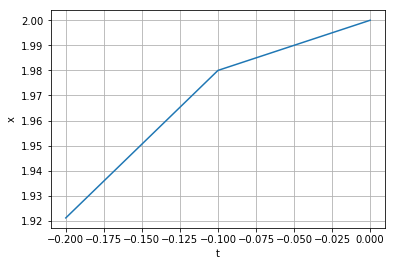

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, t):
    return -t*(x**2)

N = 3
t_values = np.linspace(0.,-0.2, N)
h = t_values[1] - t_values[0]
x_values = np.zeros(N)
x_values[0] = 2.
x_values[1] = 1.98
for i in range(1, N-1):
    x_values[i+1] = x_values[i] + h * (1.5*f(x_values[i], t_values[i]) - 0.5*f(x_values[i-1], t_values[i-1]))
print("x(t=2)=", x_values[-1])
plt.plot(t_values, x_values)
plt.xlabel('t'); plt.ylabel('x')
plt.grid()
plt.show()

In this case we were able to calculate the function value with two decimal places of precision by applying a guess for the mid-initial step needed for this order-2 algorithm. The guess was built upon the estimated value that we achieved using the taylor series approach.

### Problem 2

We shall look into simulating the projectile motion of an object provided the differential equations of motion. The momentum of a projectile thrown at rest and experiencing the pull of gravity and air drag may be described with the following equation:$$\frac{dp}{dt} = mg - kv^2$$. In order to observe the evolution of the projectile velocity we will utilize the adaptive-step Runge-Kutta method 'rkf45' provided from lecture 12. For our example we shall define the initial condition of the projectile to have $v_o = 0 \frac{m}{s}$ with a mass of 0.01kg and a drag coefficient of $k = 1*10^{-4} \frac{kg}{s^2}$.

decreased step to 0.143 at (t,y) = (0.29, 0.00)
decreased step to 0.071 at (t,y) = (0.43, 0.00)
decreased step to 0.036 at (t,y) = (0.50, 0.00)
decreased step to 0.018 at (t,y) = (0.54, 0.00)
decreased step to 0.009 at (t,y) = (0.55, 0.00)
 < error> =   0.964745910658
flops =  1064


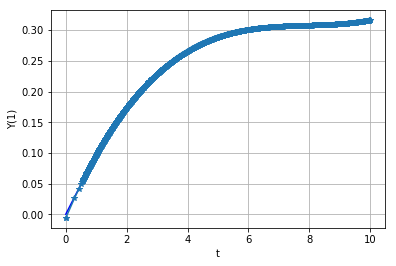

The approximate solution for this differential equation is x(t) = 0.001x^3 + -0.015x^2 + 0.116x + -0.006


In [55]:

import matplotlib.pyplot as plt          #Load Matplotlib
import numpy as np


#   Initialization
a = 0.
b = 10.
g = 9.81
mas = 0.01
k_drg = 1.0E-4
Tol = 1.0E-4                          # Error tolerance, endpoints
                                        
ydumb = np.zeros((2), float)
y = np.zeros((2), float)
fReturn = np.zeros((2), float)
err = np.zeros((2), float)

k1 = np.zeros((2), float)
k2 = np.zeros((2), float)
k3 = np.zeros((2), float)
k4 = np.zeros((2), float)
k5 = np.zeros((2), float)
k6 = np.zeros((2), float)
n = 35
yy1=[]
yy2=[]
tt=[]
y[0] = 0. 
y[1] = 0.

h = (b-a)/n
hmin=h/64
hmax=h*50                # min max step sizes
t = a
j=0
flops =0
Eexact =0.
error=0.
sum =0.
tt.append(t)
yy1.append(y[0])
yy2.append(y[1])
jj=0

def f( t, y, fReturn ):
    fReturn[0] =0             #RHS 1st eq
    fReturn[1] =  mas*g - k_drg*((y[1]/mas)**2)  #RHS 2nd 
    
while (t < b):
    yy1.append(y[0])
    yy2.append(y[1])
    tt.append(t)
    #Loop over time
                                            
    if ( (t + h) > b ):
        h = b - t                 # Last step
    f(t, y, fReturn)              #Evaluate both RHS's, return in fReturn
    k1[0] = h*fReturn[0];     k1[1] = h*fReturn[1]
    for i in range(0,2):
        ydumb[i] = y[i] + k1[i]/4 
    f(t + h/4, ydumb, fReturn) 
    k2[0] = h*fReturn[0];     k2[1] = h*fReturn[1] 
    for i in range(0,2):
        ydumb[i] = y[i]+3*k1[i]/32 + 9*k2[i]/32
    f(t + 3*h/8, ydumb, fReturn) 
    k3[0] = h*fReturn[0];  k3[1] = h*fReturn[1] 
    for i in range(0,2):
        ydumb[i] = y[i] + 1932*k1[i]/2197-7200*k2[i]/2197. + 7296*k3[i]/2197 
    f(t + 12*h/13, ydumb, fReturn) 
    k4[0] = h*fReturn[0]; k4[1] = h*fReturn[1]   
    for i in range(0,2):
        ydumb[i] = y[i]+439*k1[i]/216 -8*k2[i]+ 3680*k3[i]/513 -845*k4[i]/4104 
    f(t + h, ydumb, fReturn) 
    k5[0] = h*fReturn[0]; k5[1] = h*fReturn[1]   
    for i in range(0,2):
        ydumb[i] = y[i] -8*k1[i]/27 + 2*k2[i]-3544*k3[i]/2565 + 1859*k4[i]/4104 -11*k5[i]/40 
    f(t + h/2, ydumb, fReturn) 
    k6[0] = h*fReturn[0]; k6[1] = h*fReturn[1]; 
    for i in range(0,2):
        err[i] = abs( k1[i]/360 - 128*k3[i]/4275 - 2197*k4[i]/75240 + k5[i]/50. +2*k6[i]/55)
    if ( err[0] < Tol or err[1] < Tol or h <= 2*hmin ):
        # Accept step size
        for i in range(0,2):
            y[i] = y[i] + 25*k1[i]/216. + 1408*k3[i]/2565. + 2197*k4[i]/4104. - k5[i]/5.
        t = t + h 
        j = j + 1  
      
    if ( err[0]==0 or err[1]==0 ):
        s = 0                      # Trap division by 0
    else:
        s = 0.84*pow(Tol*h/err[0], 0.25)  
    if ( s  <  0.75 and h > 2*hmin ):
        h /= 2.                       # Reduce step
        print('decreased step to %.3f at (t,y) = (%.2f, %.2f)'% (h, t, y[0]))
    else:
        if ( s > 1.5 and 2* h  <  hmax ):
            h *= 2.                   # Increase step
            print('increased step to %.3f at (t,y) = (%.2f, %.2f)' % (h, t, y[0]))
    flops = flops +1 
    E = pow(y[0], 6.) + 0.5*y[1]*y[1] 
    Eexact = 1.  
    error = abs((E-Eexact)/Eexact)       
    sum += error  
    jj +=1
print(" < error> =  ",(sum/flops) )
print("flops = ",flops  )    

#estimate the function for the velocity of the projectile
p1 = np.polyfit(tt, yy1, 3)
p2 = np.polyfit(tt, yy2, 3)
def fit(t, *p):
    return p[0]*t**3 + p[1]*t**2 + p[2]*t + p[3]

'''plt.figure(figsize=(12,4))
plt.subplot(2,1,1)
plt.plot(tt,yy1,'r')
plt.plot(tt, fit(np.asarray(tt), *p1), '*-')
plt.grid(True)
plt.ylabel('Y(0)')
plt.subplot(2,1,2)
plt.plot(tt,yy2,'b')
plt.plot(tt, fit(np.asarray(tt), *p2), '*-')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('Y(1)')
plt.show()'''

plt.plot(tt,yy2,'b')
plt.plot(tt, fit(np.asarray(tt), *p2), '*-')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('Y(1)')
plt.show()

print('The approximate solution for this differential equation is x(t) = %.3fx^3 + %.3fx^2 + %.3fx + %.3f'%(p2[0], p2[1], p2[2], p2[3]))

Now with our amazing approximate solution we can test the accuracy of our algorithm by looking into a simple example. Suppose there is no drag for our projectile, thus k = 0. This means that the solution for our simple differential: $\frac{dx}{dt} = mg$ will be a linear function $x(t) = mgt - x_o$. This means that our algorithm should provide a linear function with a slope that approximately equals to $mg = 0.0981$. We find with the run provided below that our solution for the differential does provide a linear funtion with the slope precisely equaling to 9.81E-2.

decreased step to 0.143 at (t,y) = (0.29, 0.00)
decreased step to 0.071 at (t,y) = (0.43, 0.00)
decreased step to 0.036 at (t,y) = (0.50, 0.00)
decreased step to 0.018 at (t,y) = (0.54, 0.00)
decreased step to 0.009 at (t,y) = (0.55, 0.00)
 < error> =   0.830510636835
flops =  1064


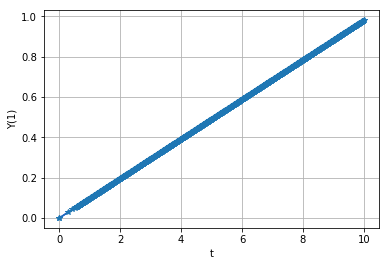

The approximate solution for this differential equation is x(t) = -3.511e-17 x^3 + 2.106e-15 x^2 + 9.810e-02 x + 1.240e-14


In [54]:

import matplotlib.pyplot as plt          #Load Matplotlib
import numpy as np


#   Initialization
a = 0.
b = 10.
g = 9.81
mas = 0.01
k_drg = 0
Tol = 1.0E-4                          # Error tolerance, endpoints
                                        
ydumb = np.zeros((2), float)
y = np.zeros((2), float)
fReturn = np.zeros((2), float)
err = np.zeros((2), float)

k1 = np.zeros((2), float)
k2 = np.zeros((2), float)
k3 = np.zeros((2), float)
k4 = np.zeros((2), float)
k5 = np.zeros((2), float)
k6 = np.zeros((2), float)
n = 35
yy1=[]
yy2=[]
tt=[]
y[0] = 0. 
y[1] = 0.

h = (b-a)/n
hmin=h/64
hmax=h*50                # min max step sizes
t = a
j=0
flops =0
Eexact =0.
error=0.
sum =0.
tt.append(t)
yy1.append(y[0])
yy2.append(y[1])
jj=0

def f( t, y, fReturn ):
    fReturn[0] =0             #RHS 1st eq
    fReturn[1] =  mas*g - k_drg*((y[1]/mas)**2)  #RHS 2nd 
    
while (t < b):
    yy1.append(y[0])
    yy2.append(y[1])
    tt.append(t)
    #Loop over time
                                            
    if ( (t + h) > b ):
        h = b - t                 # Last step
    f(t, y, fReturn)              #Evaluate both RHS's, return in fReturn
    k1[0] = h*fReturn[0];     k1[1] = h*fReturn[1]
    for i in range(0,2):
        ydumb[i] = y[i] + k1[i]/4 
    f(t + h/4, ydumb, fReturn) 
    k2[0] = h*fReturn[0];     k2[1] = h*fReturn[1] 
    for i in range(0,2):
        ydumb[i] = y[i]+3*k1[i]/32 + 9*k2[i]/32
    f(t + 3*h/8, ydumb, fReturn) 
    k3[0] = h*fReturn[0];  k3[1] = h*fReturn[1] 
    for i in range(0,2):
        ydumb[i] = y[i] + 1932*k1[i]/2197-7200*k2[i]/2197. + 7296*k3[i]/2197 
    f(t + 12*h/13, ydumb, fReturn) 
    k4[0] = h*fReturn[0]; k4[1] = h*fReturn[1]   
    for i in range(0,2):
        ydumb[i] = y[i]+439*k1[i]/216 -8*k2[i]+ 3680*k3[i]/513 -845*k4[i]/4104 
    f(t + h, ydumb, fReturn) 
    k5[0] = h*fReturn[0]; k5[1] = h*fReturn[1]   
    for i in range(0,2):
        ydumb[i] = y[i] -8*k1[i]/27 + 2*k2[i]-3544*k3[i]/2565 + 1859*k4[i]/4104 -11*k5[i]/40 
    f(t + h/2, ydumb, fReturn) 
    k6[0] = h*fReturn[0]; k6[1] = h*fReturn[1]; 
    for i in range(0,2):
        err[i] = abs( k1[i]/360 - 128*k3[i]/4275 - 2197*k4[i]/75240 + k5[i]/50. +2*k6[i]/55)
    if ( err[0] < Tol or err[1] < Tol or h <= 2*hmin ):
        # Accept step size
        for i in range(0,2):
            y[i] = y[i] + 25*k1[i]/216. + 1408*k3[i]/2565. + 2197*k4[i]/4104. - k5[i]/5.
        t = t + h 
        j = j + 1  
      
    if ( err[0]==0 or err[1]==0 ):
        s = 0                      # Trap division by 0
    else:
        s = 0.84*pow(Tol*h/err[0], 0.25)  
    if ( s  <  0.75 and h > 2*hmin ):
        h /= 2.                       # Reduce step
        print('decreased step to %.3f at (t,y) = (%.2f, %.2f)'% (h, t, y[0]))
    else:
        if ( s > 1.5 and 2* h  <  hmax ):
            h *= 2.                   # Increase step
            print('increased step to %.3f at (t,y) = (%.2f, %.2f)' % (h, t, y[0]))
    flops = flops +1 
    E = pow(y[0], 6.) + 0.5*y[1]*y[1] 
    Eexact = 1.  
    error = abs((E-Eexact)/Eexact)       
    sum += error  
    jj +=1
print(" < error> =  ",(sum/flops) )
print("flops = ",flops  )    

#estimate the function for the velocity of the projectile
p1 = np.polyfit(tt, yy1, 3)
p2 = np.polyfit(tt, yy2, 3)
def fit(t, *p):
    return p[0]*t**3 + p[1]*t**2 + p[2]*t + p[3]

'''plt.figure(figsize=(12,4))
plt.subplot(2,1,1)
plt.plot(tt,yy1,'r')
plt.plot(tt, fit(np.asarray(tt), *p1), '*-')
plt.grid(True)
plt.ylabel('Y(0)')
plt.subplot(2,1,2)
plt.plot(tt,yy2,'b')
plt.plot(tt, fit(np.asarray(tt), *p2), '*-')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('Y(1)')
plt.show()'''

plt.plot(tt,yy2,'b')
plt.plot(tt, fit(np.asarray(tt), *p2), '*-')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('Y(1)')
plt.show()

print('The approximate solution for this differential equation is x(t) = %.3e x^3 + %.3e x^2 + %.3e x + %.3e'%(p2[0], p2[1], p2[2], p2[3]))

In [ ]:
import matplotlib.pyplot as plt          #Load Matplotlib
import numpy as np


#   Initialization
a = 0.
b = 10.
g = 9.81
mas = 0.01
k_drg = 0
Tol = 1.0E-4                          # Error tolerance, endpoints
                                        
ydumb = np.zeros((2), float)
y = np.zeros((2), float)
fReturn = np.zeros((2), float)
err = np.zeros((2), float)

k1 = np.zeros((2), float)
k2 = np.zeros((2), float)
k3 = np.zeros((2), float)
k4 = np.zeros((2), float)
k5 = np.zeros((2), float)
k6 = np.zeros((2), float)
n = 35
yy1=[]
yy2=[]
tt=[]
y[0] = 0. 
y[1] = 0.

h = (b-a)/n
hmin=h/64
hmax=h*50                # min max step sizes
t = a
j=0
flops =0
Eexact =0.
error=0.
sum =0.
tt.append(t)
yy1.append(y[0])
yy2.append(y[1])
jj=0

def f( t, y, fReturn ):
    fReturn[0] =0             #RHS 1st eq
    fReturn[1] =  mas*g - k_drg*((y[1]/mas)**2)  #RHS 2nd 
    
while (t < b):
    yy1.append(y[0])
    yy2.append(y[1])
    tt.append(t)
    #Loop over time
                                            
    if ( (t + h) > b ):
        h = b - t                 # Last step
    f(t, y, fReturn)              #Evaluate both RHS's, return in fReturn
    k1[0] = h*fReturn[0];     k1[1] = h*fReturn[1]
    for i in range(0,2):
        ydumb[i] = y[i] + k1[i]/4 
    f(t + h/4, ydumb, fReturn) 
    k2[0] = h*fReturn[0];     k2[1] = h*fReturn[1] 
    for i in range(0,2):
        ydumb[i] = y[i]+3*k1[i]/32 + 9*k2[i]/32
    f(t + 3*h/8, ydumb, fReturn) 
    k3[0] = h*fReturn[0];  k3[1] = h*fReturn[1] 
    for i in range(0,2):
        ydumb[i] = y[i] + 1932*k1[i]/2197-7200*k2[i]/2197. + 7296*k3[i]/2197 
    f(t + 12*h/13, ydumb, fReturn) 
    k4[0] = h*fReturn[0]; k4[1] = h*fReturn[1]   
    for i in range(0,2):
        ydumb[i] = y[i]+439*k1[i]/216 -8*k2[i]+ 3680*k3[i]/513 -845*k4[i]/4104 
    f(t + h, ydumb, fReturn) 
    k5[0] = h*fReturn[0]; k5[1] = h*fReturn[1]   
    for i in range(0,2):
        ydumb[i] = y[i] -8*k1[i]/27 + 2*k2[i]-3544*k3[i]/2565 + 1859*k4[i]/4104 -11*k5[i]/40 
    f(t + h/2, ydumb, fReturn) 
    k6[0] = h*fReturn[0]; k6[1] = h*fReturn[1]; 
    for i in range(0,2):
        err[i] = abs( k1[i]/360 - 128*k3[i]/4275 - 2197*k4[i]/75240 + k5[i]/50. +2*k6[i]/55)
    if ( err[0] < Tol or err[1] < Tol or h <= 2*hmin ):
        # Accept step size
        for i in range(0,2):
            y[i] = y[i] + 25*k1[i]/216. + 1408*k3[i]/2565. + 2197*k4[i]/4104. - k5[i]/5.
        t = t + h 
        j = j + 1  
      
    if ( err[0]==0 or err[1]==0 ):
        s = 0                      # Trap division by 0
    else:
        s = 0.84*pow(Tol*h/err[0], 0.25)  
    if ( s  <  0.75 and h > 2*hmin ):
        h /= 2.                       # Reduce step
        print('decreased step to %.3f at (t,y) = (%.2f, %.2f)'% (h, t, y[0]))
    else:
        if ( s > 1.5 and 2* h  <  hmax ):
            h *= 2.                   # Increase step
            print('increased step to %.3f at (t,y) = (%.2f, %.2f)' % (h, t, y[0]))
    flops = flops +1 
    E = pow(y[0], 6.) + 0.5*y[1]*y[1] 
    Eexact = 1.  
    error = abs((E-Eexact)/Eexact)       
    sum += error  
    jj +=1
print(" < error> =  ",(sum/flops) )
print("flops = ",flops  )    

#estimate the function for the velocity of the projectile
p1 = np.polyfit(tt, yy1, 3)
p2 = np.polyfit(tt, yy2, 3)
def fit(t, *p):
    return p[0]*t**3 + p[1]*t**2 + p[2]*t + p[3]

'''plt.figure(figsize=(12,4))
plt.subplot(2,1,1)
plt.plot(tt,yy1,'r')
plt.plot(tt, fit(np.asarray(tt), *p1), '*-')
plt.grid(True)
plt.ylabel('Y(0)')
plt.subplot(2,1,2)
plt.plot(tt,yy2,'b')
plt.plot(tt, fit(np.asarray(tt), *p2), '*-')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('Y(1)')
plt.show()'''

plt.plot(tt,yy2,'b')
plt.plot(tt, fit(np.asarray(tt), *p2), '*-')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('Y(1)')
plt.show()


decreased step to 0.000 at (t,y) = (0.00, 0.00)
decreased step to 0.000 at (t,y) = (0.00, 0.00)
decreased step to 0.000 at (t,y) = (0.00, 0.00)
decreased step to 0.000 at (t,y) = (0.00, 0.00)
decreased step to 0.000 at (t,y) = (0.00, 0.00)
 < error> =   0.999999988204
flops =  1063


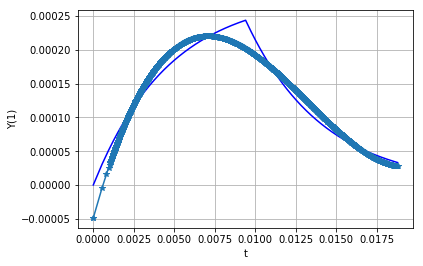

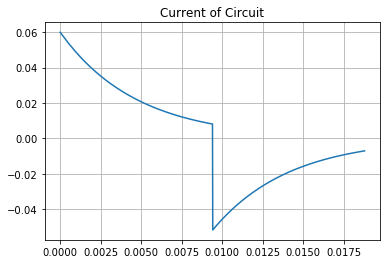

The appromate solution for this differential equation is x(t) = 2.110e+02 x^3 + -8.356e+00 x^2 + 8.657e-02 x + -4.882e-05


In [52]:
R = 100
C = 4.7*(10**-5)
t1 = 0
t2 = 2*R*C
tf = 4*R*C

def u(t):
    if (t1 <= t <= t2):
        return 6.
    else:
        return 0
    
def hev(t, l):
    if t<l:
        return 0
    else:
        return 1
    
    

import matplotlib.pyplot as plt          #Load Matplotlib
import numpy as np


#   Initialization
a = 0.
b = tf
g = 9.81
mas = 0.01
k_drg = 0
Tol = 1.0E-4                          # Error tolerance, endpoints
                                        
ydumb = np.zeros((2), float)
y = np.zeros((2), float)
fReturn = np.zeros((2), float)
err = np.zeros((2), float)

k1 = np.zeros((2), float)
k2 = np.zeros((2), float)
k3 = np.zeros((2), float)
k4 = np.zeros((2), float)
k5 = np.zeros((2), float)
k6 = np.zeros((2), float)
n = 35
yy1=[]
yy2=[]
tt=[]
y[0] = 0. 
y[1] = 0.

h = (b-a)/n
hmin=h/64
hmax=h*50                # min max step sizes
t = a
j=0
flops =0
Eexact =0.
error=0.
sum =0.
tt.append(t)
yy1.append(y[0])
yy2.append(y[1])
jj=0

def f( t, y, fReturn ):
    fReturn[0] =0             #RHS 1st eq
    fReturn[1] = (u(t) -(y[1]/C))/R  #RHS 2nd 
    
while (t < b):
    yy1.append(y[0])
    yy2.append(y[1])
    tt.append(t)
    #Loop over time
                                            
    if ( (t + h) > b ):
        h = b - t                 # Last step
    f(t, y, fReturn)              #Evaluate both RHS's, return in fReturn
    k1[0] = h*fReturn[0];     k1[1] = h*fReturn[1]
    for i in range(0,2):
        ydumb[i] = y[i] + k1[i]/4 
    f(t + h/4, ydumb, fReturn) 
    k2[0] = h*fReturn[0];     k2[1] = h*fReturn[1] 
    for i in range(0,2):
        ydumb[i] = y[i]+3*k1[i]/32 + 9*k2[i]/32
    f(t + 3*h/8, ydumb, fReturn) 
    k3[0] = h*fReturn[0];  k3[1] = h*fReturn[1] 
    for i in range(0,2):
        ydumb[i] = y[i] + 1932*k1[i]/2197-7200*k2[i]/2197. + 7296*k3[i]/2197 
    f(t + 12*h/13, ydumb, fReturn) 
    k4[0] = h*fReturn[0]; k4[1] = h*fReturn[1]   
    for i in range(0,2):
        ydumb[i] = y[i]+439*k1[i]/216 -8*k2[i]+ 3680*k3[i]/513 -845*k4[i]/4104 
    f(t + h, ydumb, fReturn) 
    k5[0] = h*fReturn[0]; k5[1] = h*fReturn[1]   
    for i in range(0,2):
        ydumb[i] = y[i] -8*k1[i]/27 + 2*k2[i]-3544*k3[i]/2565 + 1859*k4[i]/4104 -11*k5[i]/40 
    f(t + h/2, ydumb, fReturn) 
    k6[0] = h*fReturn[0]; k6[1] = h*fReturn[1]; 
    for i in range(0,2):
        err[i] = abs( k1[i]/360 - 128*k3[i]/4275 - 2197*k4[i]/75240 + k5[i]/50. +2*k6[i]/55)
    if ( err[0] < Tol or err[1] < Tol or h <= 2*hmin ):
        # Accept step size
        for i in range(0,2):
            y[i] = y[i] + 25*k1[i]/216. + 1408*k3[i]/2565. + 2197*k4[i]/4104. - k5[i]/5.
        t = t + h 
        j = j + 1  
      
    if ( err[0]==0 or err[1]==0 ):
        s = 0                      # Trap division by 0
    else:
        s = 0.84*pow(Tol*h/err[0], 0.25)  
    if ( s  <  0.75 and h > 2*hmin ):
        h /= 2.                       # Reduce step
        print('decreased step to %.3f at (t,y) = (%.2f, %.2f)'% (h, t, y[0]))
    else:
        if ( s > 1.5 and 2* h  <  hmax ):
            h *= 2.                   # Increase step
            print('increased step to %.3f at (t,y) = (%.2f, %.2f)' % (h, t, y[0]))
    flops = flops +1 
    E = pow(y[0], 6.) + 0.5*y[1]*y[1] 
    Eexact = 1.  
    error = abs((E-Eexact)/Eexact)       
    sum += error  
    jj +=1
print(" < error> =  ",(sum/flops) )
print("flops = ",flops  )    

#estimate the function for the velocity of the projectile
p1 = np.polyfit(tt, yy1, 3)
p2 = np.polyfit(tt, yy2, 3)
def fit(t, *p):
    return p[0]*t**3 + p[1]*t**2 + p[2]*t + p[3]

'''plt.figure(figsize=(12,4))
plt.subplot(2,1,1)
plt.plot(tt,yy1,'r')
plt.plot(tt, fit(np.asarray(tt), *p1), '*-')
plt.grid(True)
plt.ylabel('Y(0)')
plt.subplot(2,1,2)
plt.plot(tt,yy2,'b')
plt.plot(tt, fit(np.asarray(tt), *p2), '*-')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('Y(1)')
plt.show()'''

plt.plot(tt,yy2,'b')
plt.plot(tt, fit(np.asarray(tt), *p2), '*-')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('Y(1)')
plt.show()


I_vl = np.zeros( len(tt), float)

for s in range(len(tt)):
    t_r = tt[s]
    y_r = [0, yy2[s]]
    f(t_r, y_r, fReturn)
    I_vl[s] = fReturn[1]
    
plt.plot(tt, I_vl)
plt.grid()
plt.title('Current of Circuit')
plt.show()

print('The appromate solution for this differential equation is x(t) = %.3e x^3 + %.3e x^2 + %.3e x + %.3e'%(p2[0], p2[1], p2[2], p2[3]))

In [49]:
fReturn

array([ 0.        ,  0.04912384])